### Proyecto intermodular Enero

In [1]:
# ==============================
# IMPORTACIÓN DE LIBRERÍAS
# ==============================

# ------------------------------------------------------------
# import matplotlib.pyplot as plt:
#   - Visualización 2D con Matplotlib (figuras, ejes y gráficos).
# ------------------------------------------------------------
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# from src.utils import load_yaml:
#   - Carga archivos YAML y retorna la configuración como dict.
#   - Carga datasets desde ruta (p. ej., CSV/Parquet/Excel) y retorna un DataFrame.
# ------------------------------------------------------------
from src.utils import load_yaml, load_dataset


In [2]:
# ==============================
# IMPORTACIÓN DE MÓDULOS DEL PROYECTO
# ==============================

# ------------------------------------------------------------
# from src.utils import load_yaml:
#   - Carga configuración YAML y la retorna como dict.
# ------------------------------------------------------------
from src.utils import load_yaml

# ------------------------------------------------------------
# from src.eda_helper import EDAHelper:
#   - Utilidades para EDA (resúmenes, nulos, distribuciones, correlaciones y gráficos).
# ------------------------------------------------------------
from src.eda_helper import EDAHelper


In [3]:
# ==============================
# CARGA DE CONFIGURACIÓN Y PARÁMETROS DEL PIPELINE
# ==============================

# ------------------------------------------------------------
# cfg:
#   - Configuración cargada desde YAML para controlar el pipeline sin tocar código.
#   - Estructura: cfg["seccion"]["parametro"].
# ------------------------------------------------------------
cfg = load_yaml("config.yml")

# ==============================
# RUTAS Y DIRECTORIOS DEL PROYECTO
# ==============================

# ------------------------------------------------------------
# DATASET_TRAIN → ruta del dataset de entrenamiento.
# ------------------------------------------------------------
DATASET_TRAIN  = cfg["paths"]["dataset_train"]

# ==============================
# TARGET
# ==============================

# ------------------------------------------------------------
# TARGET / VALUE_TARGET:
#   - TARGET       → nombre de la columna objetivo en el DataFrame.
#   - VALUE_TARGET → clase/valor “positivo” o de interés (para binaria o reglas del negocio).
# ------------------------------------------------------------
TARGET         = cfg["target"]["col"]
VALUE_TARGET   = cfg["target"]["value"]

# ==============================
# PARÁMETROS GENERALES
# ==============================

# ------------------------------------------------------------
# MAX_EXAMPLES / SEP_LEN:
#   - MAX_EXAMPLES → límite de registros para pruebas rápidas (si se aplica en el flujo).
#   - SEP_LEN      → longitud de separadores/formatos para prints/logs.
# ------------------------------------------------------------
MAX_EXAMPLES   = cfg["config"]["max_examples"]
SEP_LEN        = cfg["config"]["sep_len"]


In [4]:
# ==============================
# INICIALIZACIÓN DE COMPONENTES DEL PIPELINE
# ==============================

# ------------------------------------------------------------
# EDA = EDAHelper(TARGET, MAX_EXAMPLES, SEP_LEN):
#   - Instancia el componente de EDA para análisis exploratorio y utilidades de diagnóstico.
#   - Entradas:
#       * TARGET       → nombre/clave de la variable objetivo.
#       * MAX_EXAMPLES → límite de ejemplos/filas a mostrar en salidas/resúmenes.
#       * SEP_LEN      → longitud de separadores para formateo visual en prints/reportes.
#   - Resultado:
#       * `EDA` queda listo para ejecutar resúmenes, validaciones y visualizaciones rápidas.
# ------------------------------------------------------------
EDA = EDAHelper(TARGET, MAX_EXAMPLES, SEP_LEN)


In [5]:
# ==============================
# CARGA DEL DATASET DE ENTRENAMIENTO
# ==============================

# ------------------------------------------------------------
# df = EDA.load_dataset(DATASET_TRAIN):
#   - Lee el dataset desde `DATASET_TRAIN` y lo retorna como `pandas.DataFrame`.
#   - Centraliza la lectura (formato, parseo básico) para mantener el pipeline consistente.
# ------------------------------------------------------------
df = load_dataset(DATASET_TRAIN)

# ------------------------------------------------------------
# df.head(5):
#   - Muestra las primeras 5 filas para verificar:
#       * columnas esperadas
#       * valores y nulos evidentes
#       * que la carga no viene desfasada o corrupta
# ------------------------------------------------------------
df.head(5)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Frequently,693,Research & Development,7,3,Life Sciences,1,1382,4,...,80,3,4,2,3,4,2,0,3,No
1,36,Travel_Rarely,928,Sales,1,2,Life Sciences,1,857,2,...,80,1,18,1,2,18,14,4,11,No
2,42,Travel_Rarely,855,Research & Development,12,3,Medical,1,1768,2,...,80,3,7,6,2,5,3,0,4,No
3,40,Travel_Rarely,1342,Sales,9,2,Medical,1,1548,1,...,80,0,9,5,4,8,4,7,1,No
4,38,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,1,...,80,0,17,2,3,15,7,4,12,No



📌 Dimensiones del dataset

  - Filas: 1,323
  - Columnas: 35

📌 Valores nulos por columna

  - No hay valores nulos

📌 Duplicados

  - Filas duplicadas: 0

📌 Columnas con strings vacíos o espacios en blanco

  - No hay valores vacíos
  ✔ Comprobación completa.

📌 Valores únicos por columna (primeros 10)

  - Age:                        43 valores: [38 36 42 40 28 29 52 47 46 45]
  --------------------------------------------------
  - BusinessTravel:              3 valores: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
  --------------------------------------------------
  - DailyRate:                 836 valores: [693 928 855 1342 240 603 1300 1086 956 571]
  --------------------------------------------------
  - Department:                  3 valores: ['Research & Development' 'Sales' 'Human Resources']
  --------------------------------------------------
  - DistanceFromHome:           29 valores: [7 1 12 9 2 17 6 14 26 22]
  --------------------------------------------------


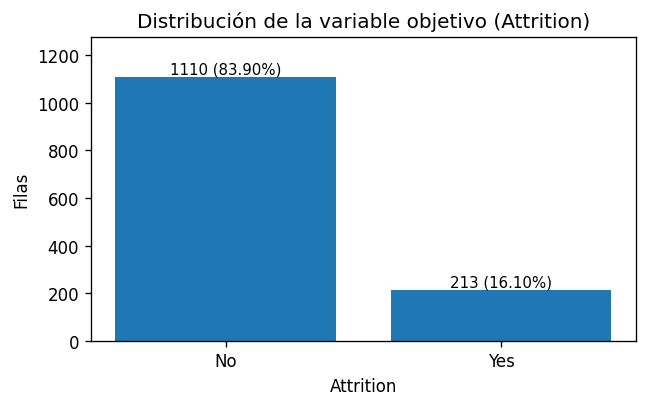

In [6]:
# ==============================
# EDA: RESUMEN GENERAL DEL DATASET
# ==============================

# ------------------------------------------------------------
# EDA.show_dataset_details(df, plt=plt):
#   - Muestra un resumen operativo del dataset para una revisión rápida antes de modelar.
#   - Incluye típicamente:
#       * dimensiones (filas/columnas) y tipos de datos
#       * conteo de nulos y/o duplicados
#       * estadísticas descriptivas (numéricas y/o categóricas)
#       * ejemplos de registros (según `MAX_EXAMPLES`)
#       * visualizaciones básicas (si el método las implementa)
#   - Parámetros:
#       * df  → DataFrame de entrada a inspeccionar.
#       * plt → handler de Matplotlib para renderizar gráficos dentro del método.
# ------------------------------------------------------------
EDA.show_dataset_details(df, plt=plt)
